In [131]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

df = pd.read_csv("~/Documents/clean_coaster_full.csv")
df = df.fillna('M')

In [132]:
pd.set_option('display.max_rows', 10)
df

,coaster_name,Length,Location,Status,Manufacturer,Model,Height,launch_system,Duration,year_introduced,Type_Main,speed_mph,Inversions_clean,Gforce_clean,coaster_rating
0,10 Inversion Roller Coaster,2788.8,Chimelong Paradise,Operating,Intamin,Looping Coaster,98.4,Other,92.0,2006,Steel,45.0,10,M,49.4
1,Abyss,2070.0,Adventure World,Operating,Gerstlauer,Euro-Fighter,98.0,Chain Lift,120.0,2013,Steel,52.8,3,4.5,64.1
2,Abyssus,4317.6,Energylandia,Operating,Vekoma,Other,126.3,LSM Launch,M,2021,Steel,62.1,4,4.5,91.7
3,Accelerator,590.0,Drayton Manor Theme Park,Operating,Vekoma,Family Coaster,66.0,Other,M,2011,Steel,37.3,0,3.0,41.8
4,Acrobat,3349.8,Nagashima Spa Land,Operating,Bolliger & Mabillard,Other,141.1,Chain Lift,180.0,2015,Steel,55.9,4,M,88.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Zadra,4318.0,Energylandia,Operating,Rocky Mountain Construction,Other,206.0,Chain Lift,110.0,2019,Other,75.2,3,4.0,99.7
896,Zeus,2900.0,Mt. Olympus Water & Theme Park,Operating,Custom Coasters International,Other,90.0,Other,85.0,1997,Wood,60.0,0,M,72.7
897,Zippin Pippin,2865.0,Bay Beach,Operating,The Gravity Group,Wooden Out and Back,70.0,Chain Lift,118.0,1912,Wood,40.0,0,M,79.2
898,Zoomerang,935.0,Lake Compounce,Operating,Vekoma,Boomerang,116.5,Other,108.0,1997,Steel,47.0,3,5.2,14.9


In [133]:
import numpy as np

variables = {
    'Length': [0, 1000, 2000, 3000, 3500, 4500, np.inf],
    'Height': [0, 50, 75, 100, 125, 175, 225, np.inf],
    'Duration': [0, 49, 69, 89, 109, 139, 159, np.inf],
    'speed_mph': [0, 31, 39, 49, 59, 69, np.inf],  
    'Gforce_clean': [0, 2.6, 3.49, 3.99, 4.49, 4.99, np.inf]
}

labels_dict = {
    'Length': ['0-1000', '1000-2000', '2000-3000', '3000-3500', '3500-4500', '4500+'],
    'Height': ['0-50', '50-75', '75-100', '100-125', '125-175', '175-225', '225+'],
    'Duration': ['0-49', '49-69', '69-89', '89-109', '109-139', '139-159', '159+'],
    'speed_mph': ['0-31', '31-39', '39-49', '49-59', '59-69', '69+'],
    'Gforce_clean': ['0-2.6', '2.6-3.49', '3.49-3.99', '3.99-4.49', '4.49-4.99', '5+']
}

def bin_variable_custom(df, variable, bins, labels):
    df[variable] = pd.to_numeric(df[variable], errors='coerce')
    
    df[variable] = pd.cut(df[variable], bins=bins, labels=labels, include_lowest=True, right=False)
    return df

for var, bins in variables.items():
    if var in df.columns:  
        df = bin_variable_custom(df, var, bins, labels_dict[var])
    else:
        print(f"Warning: Column '{var}' not found in the DataFrame") 

In [134]:
def bin_inversions(df, variable):
    df[variable] = pd.to_numeric(df[variable], errors='coerce')
    bins = [0, 1, 2, 4, 5, np.inf]
    labels = ['0', '1', '2', '3-4', '5+']
    df[variable] = pd.cut(df[variable], bins=bins, labels=labels, right=False)
    return df

df = bin_inversions(df, 'Inversions_clean')

df

,coaster_name,Length,Location,Status,Manufacturer,Model,Height,launch_system,Duration,year_introduced,Type_Main,speed_mph,Inversions_clean,Gforce_clean,coaster_rating
0,10 Inversion Roller Coaster,2000-3000,Chimelong Paradise,Operating,Intamin,Looping Coaster,75-100,Other,89-109,2006,Steel,39-49,5+,NaN,49.4
1,Abyss,2000-3000,Adventure World,Operating,Gerstlauer,Euro-Fighter,75-100,Chain Lift,109-139,2013,Steel,49-59,2,4.49-4.99,64.1
2,Abyssus,3500-4500,Energylandia,Operating,Vekoma,Other,125-175,LSM Launch,NaN,2021,Steel,59-69,3-4,4.49-4.99,91.7
3,Accelerator,0-1000,Drayton Manor Theme Park,Operating,Vekoma,Family Coaster,50-75,Other,NaN,2011,Steel,31-39,0,2.6-3.49,41.8
4,Acrobat,3000-3500,Nagashima Spa Land,Operating,Bolliger & Mabillard,Other,125-175,Chain Lift,159+,2015,Steel,49-59,3-4,NaN,88.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Zadra,3500-4500,Energylandia,Operating,Rocky Mountain Construction,Other,175-225,Chain Lift,109-139,2019,Other,69+,2,3.99-4.49,99.7
896,Zeus,2000-3000,Mt. Olympus Water & Theme Park,Operating,Custom Coasters International,Other,75-100,Other,69-89,1997,Wood,59-69,0,NaN,72.7
897,Zippin Pippin,2000-3000,Bay Beach,Operating,The Gravity Group,Wooden Out and Back,50-75,Chain Lift,109-139,1912,Wood,39-49,0,NaN,79.2
898,Zoomerang,0-1000,Lake Compounce,Operating,Vekoma,Boomerang,100-125,Other,89-109,1997,Steel,39-49,2,5+,14.9


In [135]:
# Add 'M' category and fill missing values for each column in sequence
for column in ['Height', 'Duration', 'Length', 'speed_mph', 'Inversions_clean', 'Gforce_clean']:
    df[column] = df[column].cat.add_categories('M')
    df[column] = df[column].fillna('M')


In [136]:
df

,coaster_name,Length,Location,Status,Manufacturer,Model,Height,launch_system,Duration,year_introduced,Type_Main,speed_mph,Inversions_clean,Gforce_clean,coaster_rating
0,10 Inversion Roller Coaster,2000-3000,Chimelong Paradise,Operating,Intamin,Looping Coaster,75-100,Other,89-109,2006,Steel,39-49,5+,M,49.4
1,Abyss,2000-3000,Adventure World,Operating,Gerstlauer,Euro-Fighter,75-100,Chain Lift,109-139,2013,Steel,49-59,2,4.49-4.99,64.1
2,Abyssus,3500-4500,Energylandia,Operating,Vekoma,Other,125-175,LSM Launch,M,2021,Steel,59-69,3-4,4.49-4.99,91.7
3,Accelerator,0-1000,Drayton Manor Theme Park,Operating,Vekoma,Family Coaster,50-75,Other,M,2011,Steel,31-39,0,2.6-3.49,41.8
4,Acrobat,3000-3500,Nagashima Spa Land,Operating,Bolliger & Mabillard,Other,125-175,Chain Lift,159+,2015,Steel,49-59,3-4,M,88.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Zadra,3500-4500,Energylandia,Operating,Rocky Mountain Construction,Other,175-225,Chain Lift,109-139,2019,Other,69+,2,3.99-4.49,99.7
896,Zeus,2000-3000,Mt. Olympus Water & Theme Park,Operating,Custom Coasters International,Other,75-100,Other,69-89,1997,Wood,59-69,0,M,72.7
897,Zippin Pippin,2000-3000,Bay Beach,Operating,The Gravity Group,Wooden Out and Back,50-75,Chain Lift,109-139,1912,Wood,39-49,0,M,79.2
898,Zoomerang,0-1000,Lake Compounce,Operating,Vekoma,Boomerang,100-125,Other,89-109,1997,Steel,39-49,2,5+,14.9


In [137]:
coaster_names = df['coaster_name']  
df = df.drop('coaster_name', axis=1) 

In [139]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

df = pd.get_dummies(df, columns=categorical_columns)

In [140]:
# Separating Training and Testing data (80% train, 20% test)
train, valid = train_test_split(df, train_size=0.8, random_state=590389)

# Splitting the validation set into validation (10%) and test (10%)
valid, test = train_test_split(valid, test_size=0.5, random_state=590389)

In [141]:
X_train = train.drop(["coaster_rating"], axis = 1)
y_train = train["coaster_rating"]

X_valid = valid.drop(["coaster_rating"], axis = 1)
y_valid = valid["coaster_rating"]

X_test = test.drop(["coaster_rating"], axis=1)
y_test = test["coaster_rating"]

In [143]:
from xgboost import XGBRegressor

xgb_coaster = XGBRegressor(n_estimators = 50,
                            subsample = 0.5,
                            random_state = 12345)

xgb_coaster.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=12345, ...)

In [145]:
from sklearn.model_selection import GridSearchCV

In [147]:
param_grid = {
    'n_estimators': [20, 40, 60, 80, 100],
    'eta': [0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'subsample': [0.25, 0.5, 0.75, 1]
}

xgb = XGBRegressor()

grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 10)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'eta': [0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [20, 40, 60, 80, 100],
                         'subsample': [0.25, 0.5, 0.75, 1]})

In [148]:
grid_search.best_params_

{'eta': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.5}

In [149]:
xgb_coaster = XGBRegressor(n_estimators = 100,
                        subsample = 0.5,
                        eta = 0.1,
                        max_depth = 6,
                        random_state = 12345)

xgb_coaster.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

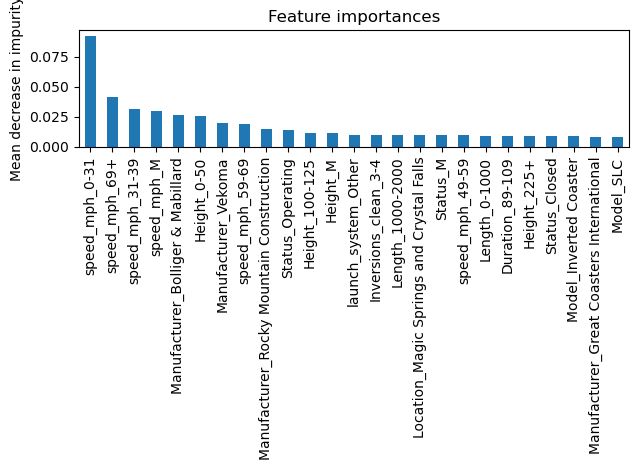

In [151]:
forest_importances = pd.Series(xgb_coaster.feature_importances_, index = xgb_coaster.feature_names_in_)

top_25_importances = forest_importances.sort_values(ascending=False).head(25)

fig, ax = plt.subplots()
top_25_importances.plot.bar(ax = ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

plt.show()

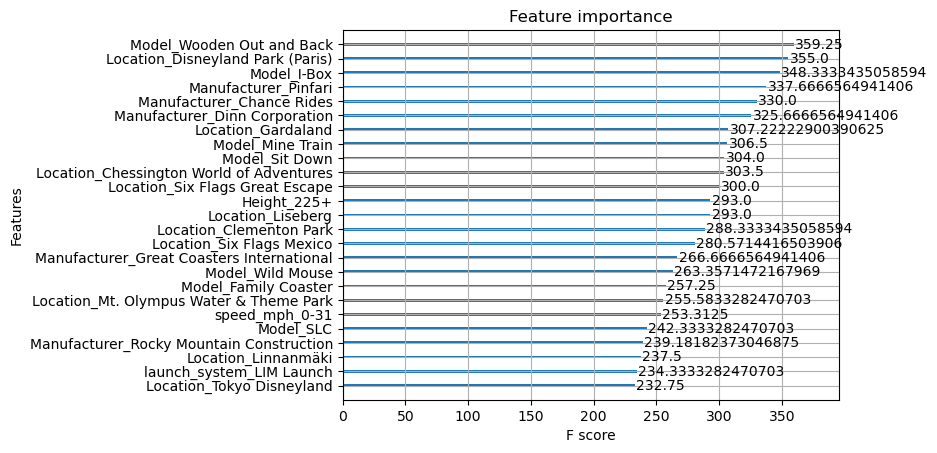

In [153]:
import xgboost

xgboost.plot_importance(xgb_coaster, importance_type = 'cover', max_num_features = 25)

plt.show()

In [169]:
import numpy as np

X_train_r = X_train

X_train_r['random'] = np.random.normal(0, 1, 720)

In [170]:
xgb_coaster = XGBRegressor(n_estimators = 100,
                        subsample = 0.5,
                        eta = 0.1,
                        max_depth = 6,
                        random_state = 12345)

xgb_coaster.fit(X_train_r, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

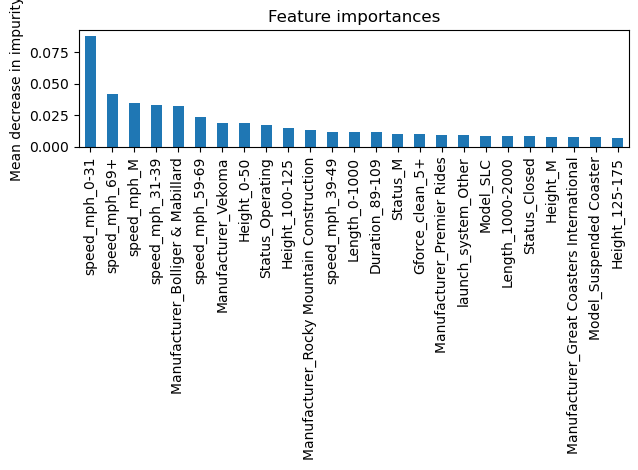

In [171]:
forest_importances = pd.Series(xgb_coaster.feature_importances_, index = xgb_coaster.feature_names_in_)

top_25_importances = forest_importances.sort_values(ascending=False).head(25)

fig, ax = plt.subplots()
top_25_importances.plot.bar(ax = ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

plt.show()

In [172]:
# Get the rank of "randoM" in the sorted importances
if "random" in forest_importances.index:
    rank = forest_importances.index.get_loc("random") + 1  # Adding 1 for 1-based rank
    print(f"Variable 'random' is ranked #{rank} in importance.")
else:
    print("Variable 'random' is not in the top importances.")


Variable 'random' is ranked #270 in importance.
